<a href="https://colab.research.google.com/github/Thomson2020/PROJECTS/blob/main/FFT_and_DFT_by_import_sound_and_N_sine_waves_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Enter the number of frequencies:
5
Enter frequency 1: 10
Enter frequency 2: 500
Enter frequency 3: 300
Enter frequency 4: 200
Enter frequency 5: 250


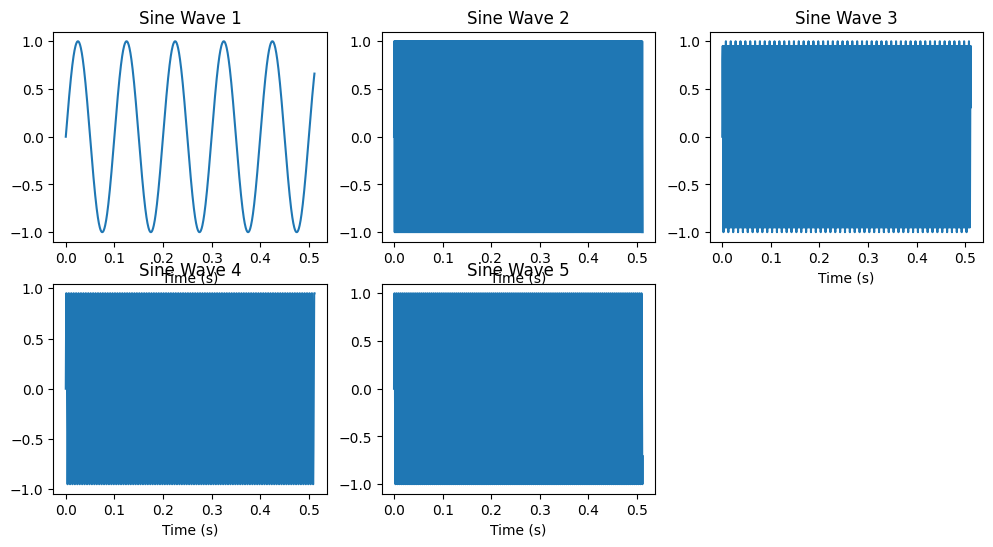

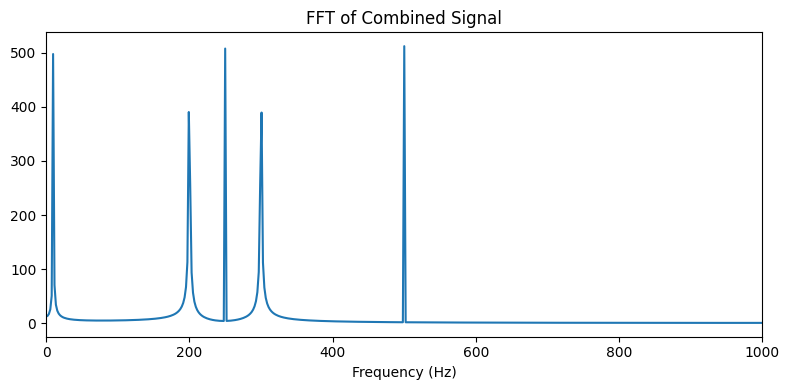

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

sampling_rate = 2000
duration = 1.0
frequencies = []
num_frequencies = int(input("Enter the number of frequencies:\n"))

for i in range(num_frequencies):
    freq = float(input(f"Enter frequency {i + 1}: "))
    frequencies.append(freq)

t = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)
sum_of_signal = np.sum([np.sin(2 * np.pi * freq * t) for freq in frequencies], axis=0)

# Ensure that the length of the input signal is a power of 2
length = 2**int(np.log2(len(t)))
t = t[:length]
sum_of_signal = sum_of_signal[:length]

def DFT(x):
    N = len(x)
    X = np.zeros(N, dtype=complex)
    for k in range(N):
        X[k] = sum(x[n] * np.exp(-2j * np.pi * k * n / N) for n in range(N))
    return X

X = DFT(sum_of_signal)  # Calculate the DFT of the combined signal

# Create a manual frequency axis
N = len(X)
frequency_axis = np.arange(N) * sampling_rate / N

num_rows = 2
num_cols = (num_frequencies + num_rows - 1) // num_rows  # Adjust the number of columns
plt.figure(figsize=(12, 6))

for i, freq in enumerate(frequencies):
    plt.subplot(num_rows, num_cols, i + 1)
    plt.plot(t, np.sin(2 * np.pi * freq * t))
    plt.title(f'Sine Wave {i + 1}')
    plt.xlabel('Time (s)')

plt.figure(figsize=(8, 4))
plt.plot(frequency_axis, np.abs(X))
plt.title('FFT of Combined Signal')
plt.xlabel('Frequency (Hz)')
plt.xlim(0, sampling_rate / 2)

plt.tight_layout()
plt.show()


Enter the number of frequencies:
5
Enter frequency 1: 500
Enter frequency 2: 250
Enter frequency 3: 700
Enter frequency 4: 30
Enter frequency 5: 100


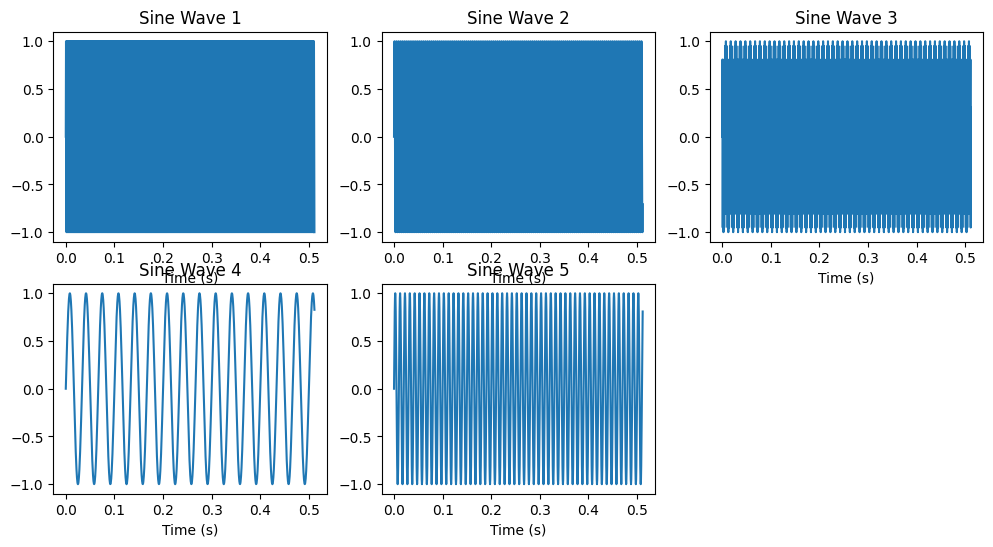

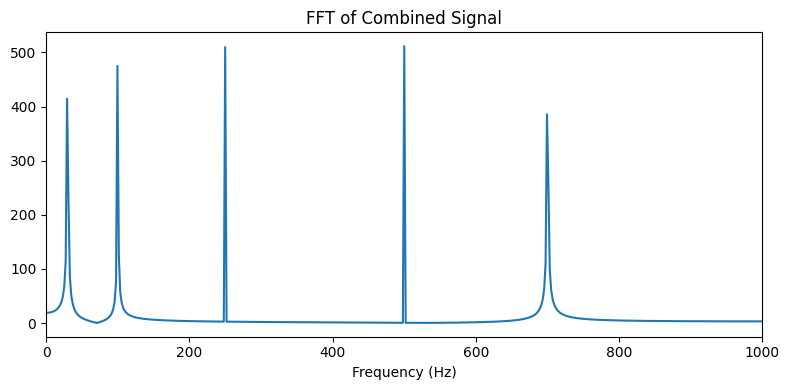

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

sampling_rate = 2000
duration = 1.0
frequencies = []
num_frequencies = int(input("Enter the number of frequencies:\n"))

for i in range(num_frequencies):
    freq = float(input(f"Enter frequency {i + 1}: "))
    frequencies.append(freq)

t = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)
sum_of_signal = np.sum([np.sin(2 * np.pi * freq * t) for freq in frequencies], axis=0)

# Ensure that the length of the input signal is a power of 2
length = 2**int(np.log2(len(t)))
t = t[:length]
sum_of_signal = sum_of_signal[:length]

def fft(x):
    N = len(x)

    if N <= 1:
        return x

    even = fft(x[::2])
    odd = fft(x[1::2])

    # Zero-pad the shorter component to match the length of the longer one
    if len(even) < len(odd):
        even = np.concatenate((even, np.zeros(len(odd) - len(even))))
    else:
        odd = np.concatenate((odd, np.zeros(len(even) - len(odd))))

    T = [np.exp(-2j * np.pi * k / N) * odd[k] for k in range(N // 2)]

    return [even[k] + T[k] for k in range(N // 2)] + [even[k] - T[k] for k in range(N // 2)]

# Calculate the FFT of the combined signal
X_fft = fft(sum_of_signal)

# Create a frequency axis
N = len(X_fft)
frequency_axis = np.arange(N) * sampling_rate / N

# Create subplots dynamically based on the number of frequencies
num_rows = 2
num_cols = (num_frequencies + num_rows - 1) // num_rows  # Adjust the number of columns
plt.figure(figsize=(12, 6))

for i, freq in enumerate(frequencies):
    plt.subplot(num_rows, num_cols, i + 1)
    plt.plot(t, np.sin(2 * np.pi * freq * t))
    plt.title(f'Sine Wave {i + 1}')
    plt.xlabel('Time (s)')

plt.figure(figsize=(8, 4))
plt.plot(frequency_axis, np.abs(X_fft))
plt.title('FFT of Combined Signal')
plt.xlabel('Frequency (Hz)')
plt.xlim(0, sampling_rate / 2)

plt.tight_layout()
plt.show()


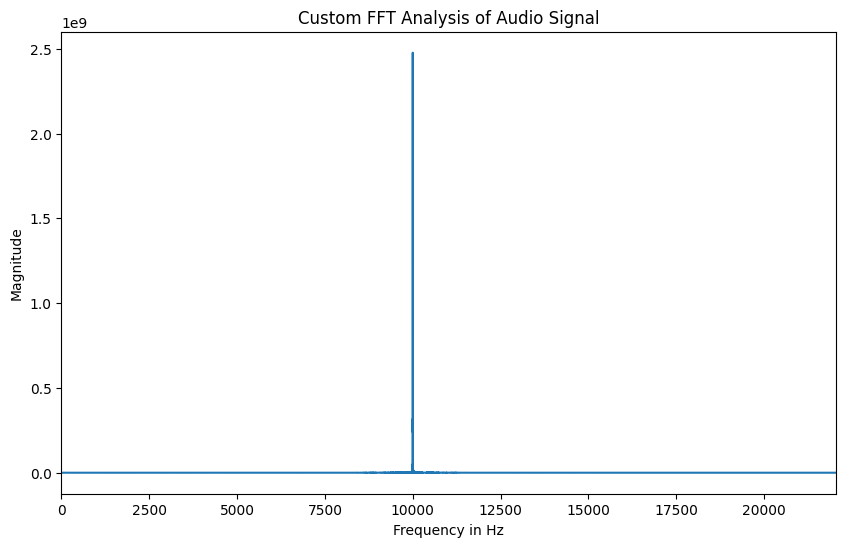

The time of execution of above program is : 8371.57392501831 ms


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from pydub import AudioSegment
from scipy.io import wavfile
import time

start = time.time()

def custom_fft(x):
    N = len(x)

    if N <= 1:
        return x

    even = custom_fft(x[::2])
    odd = custom_fft(x[1::2])

    # Zero-pad the shorter component to match the length of the longer one
    even_length, odd_length = len(even), len(odd)
    if even_length < odd_length:
        even = np.concatenate((even, np.zeros(odd_length - even_length)))
    else:
        odd = np.concatenate((odd, np.zeros(even_length - odd_length)))

    T = [np.exp(-2j * np.pi * k / N) * odd[k] for k in range(N // 2)]

    return [even[k] + T[k] for k in range(N // 2)] + [even[k] - T[k] for k in range(N // 2)]

# Input audio file (e.g., mp3, wav)
input_audio_file = "hehe.mp3"

# Convert the input audio to WAV format
output_wav_file = "outputnewfinal.wav"

# Convert the audio to WAV using pydub
audio = AudioSegment.from_file(input_audio_file)
audio.export(output_wav_file, format="wav")

# Read the WAV file and perform FFT using the custom function
sample_rate, audio_data = wavfile.read(output_wav_file)

# Ensure the audio data is one-dimensional
if audio_data.ndim > 1:
    audio_data = audio_data[:, 0]  # Convert to mono by selecting one channel

# Zero-pad the audio data to the nearest power of 2
N = len(audio_data)
next_power_of_2 = 2**int(np.ceil(np.log2(N)))
if N < next_power_of_2:
    zeros_to_add = next_power_of_2 - N
    audio_data = np.concatenate((audio_data, np.zeros(zeros_to_add)))

# Apply the custom FFT function
fft_result = custom_fft(audio_data)
N = len(fft_result)

# Create a frequency axis
frequency_axis = np.arange(N) * sample_rate / N

# Plot the magnitude of the FFT result
plt.figure(figsize=(10, 6))
plt.plot(frequency_axis[:N // 2], np.abs(fft_result[:N // 2]))
plt.xlabel('Frequency in Hz')
plt.ylabel('Magnitude')
plt.xlim(0, sample_rate / 2)
plt.title('Custom FFT Analysis of Audio Signal')
plt.show()

# Clean up: remove the intermediate WAV file
os.remove(output_wav_file)


a = 0
for i in range(1000):
    a += (i**100)

# record end time
end = time.time()

# print the difference between start
# and end time in milli. secs
print("The time of execution of above program is :",
      (end-start) * 10**3, "ms")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

# Function to perform Discrete Fourier Transform (DFT)
def custom_dft(x):
    N = len(x)
    X = np.zeros(N, dtype=complex)
    for k in range(N):
        X[k] = sum(x[n] * np.exp(-2j * np.pi * k * n / N) for n in range(N))
    return X

# Input audio file in WAV format (replace with your WAV file path)
input_audio_file = "output_audio .wav"

# Read the WAV file
sample_rate, audio_data = wavfile.read(input_audio_file)

# Ensure the audio data is one-dimensional
if audio_data.ndim > 1:
    audio_data = audio_data[:, 0]  # Convert to mono by selecting one channel

# Apply the custom DFT function
dft_result = custom_dft(audio_data)
N = len(dft_result)

# Create a frequency axis
frequency_axis = np.arange(N) * sample_rate / N

# Plot the magnitude of the DFT result
plt.figure(figsize=(10, 6))
plt.plot(frequency_axis[:N // 2], np.abs(dft_result[:N // 2]))
plt.xlabel('Frequency in Hz')
plt.ylabel('Magnitude')
plt.xlim(0, sample_rate / 2)
plt.title('Custom DFT Analysis of Audio Signal')
plt.show()


DFT needs working